<h1> Notebook 1 - Regresión Lineal</h1>

<p> En este notebook, vamos a implementar un método utilizando el algoritmo de <b>regresión lineal</b> en Python. El objetivo es poder describir este algoritmo y poder re-utilizarlo para resolver problemas de clasificación simple.</p> 

<h2> 1. Definición </h2>
<p> El algoritmo de <b>regresión lineal</b> es un algortimo de aprendizaje supervisado, de tipo <b>regresión</b>. Los algoritmos de regresión permiten de predecir <b> variables <u>continuas</u></b> a partir de una variable (este caso, hablamos de regresión lineal simple) o varias variables (regresión lineal múltiple).</p>

<p>Por ejemplo, predecir el precio de una casa según la superficie de la casa, su ubicación y/o el tipo de material utilizado, es típicamente un problema de regresión.</p>
    
<p> En otros terminos, la <b>regresión lineal</b> consiste en encontrar una recta, un plano o un hiperplano que aproxima la distribución de un conjunto de puntos. Detallamos esta idea a continuación con ejemplos e implementación en Python. </p>

<h2> 2. Implementación de una Regresión Lineal simple </h2>

<p>Consideremos el <b>problema siguiente</b>:</p>
<p>Usted es el jefe de una empresa de <i>FoodTrucks</i> y busca una nueva ciudad dónde implementar un nuevo punto de venta. Su empresa ya tiene camiones en distintas ciudades y tiene a su disposición los datos indicandos el beneficio realizado en cada ciudad. Usted desea utilizar estos datos para estimar qué beneficio van a realizar según la ciudad escogida.</p>

<p> Este problema es de tipo <b>supervisado</b> porque conocemos cuál es el tipo de variable que queremos predecir:</p>
 - Y: la variable que queremos predecir (<i>volumen de negocio</i>),<br>
 - X: la variable explicativa (<i>tamaño de la ciudad</i>)

In [2]:
#Nuestros datos son al formato CSV y tienen 2 columnas: la populación de la ciudad (por 10000 personas) 
#y el beneficio realizado por la empresa en este ciudad
import pandas as pd
df = pd.read_csv("nb1-dataset1.csv")
df

,Population (10000 pers.),Beneficio (10K$)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [3]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = df.iloc[0:len(df),0]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
Y = df.iloc[0:len(df),1] 

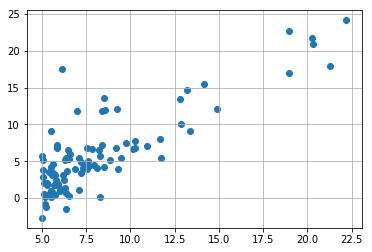

In [5]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

Para aprender un modelo predictivo basado en una regresión lineal, vamos a utilizar la librería Python ScyPy (una librería python open-source para las matemáticas: <a href="https://www.scipy.org/">SciPy</a>).

In [18]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

1.1930336441895941
-3.8957808783118555
0.8378732325263409
1.0232099778760961e-26
0.07974394383258743


<b>Preguntas</b>: 
- ¿Qué hizó la función 'linregress'? <br>
    - Calcula una regresión lineal de mínimos cuadrados para dos conjuntos de mediciones <br>
- Variables <br>
    - slope : slope of the regression line<br>
    - intercept : intercept of the regression line<br>
    - rvalue : correlation coefficient<br>
    - pvalue : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.<br>
    - stderr : Standard error of the estimated gradient.<br>


In [7]:
#Definemos una función que predice 'y' (variable de output), a partir de 'x' (variable de input)  
def predict(x):
   return slope * x + intercept

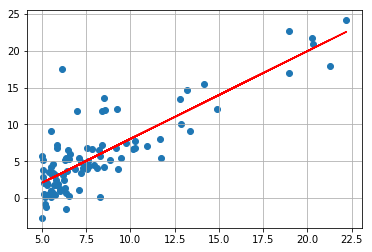

In [9]:
#Visualizemos el modelo aprendido por el algoritmo de Regresión Lineal
fitLine = predict(X)
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show()

<p>Según este modelo, ¿cuál sería el beneficio esperado si la ciudad en la cual pensamos instalar un <a>FoodTruck</a> tiene 127.000 habitantes?</p> (pueden utilizar la función "predict()" que definimos anteriormente).

In [15]:
print(predict(12.7))

11.255746402895989


<b>Preguntas</b>:
- ¿Cómo saber qué tan correcto es nuestro modelo?<br>
    - Con el el standard (stderr)<br>
- ¿Qué deberiamos hacer para medir la calidad predictiva de nuestro modelo?<br>
    - Tomar mas datos y evaluarlo con vs la realidad<br>

<h2> 3. Regresión lineal múltiple </h2>

En general, no es siempre posible predecir una variable a partir de una sola variable explicativa. A menudo, se necesita varias variables. En este caso, hablamos de <i>Multivariate Regresion</i>.

<b>Problema</b>:
<p>Supongamos que usted quiere vender su casa y buscar cuál podría ser un buen precio para venderla. Tienen a su disposición un dataset que indica el precio de venta de varias casas de su región y de 2 otras variables:</p>
- la superficie de la casa, <br>
- el número de habitaciones.

In [19]:
import pandas as pd
df2 = pd.read_csv("nb1-dataset2.csv")
print(df2.head())

   Superficie  Numero_habitaciones  Precio
0        2104                    3  399900
1        1600                    3  329900
2        2400                    3  369000
3        1416                    2  232000
4        3000                    4  539900


Luego, tenemos que diferenciar las variables predictivas X (Superficie, Numero de habitaciones) y la variable objetivo Y (Precio).

In [20]:
# Variable objetivo
Y = df2["Precio"]
# Variables predictivas (o explicativas)
X = df2[['Superficie','Numero_habitaciones']]

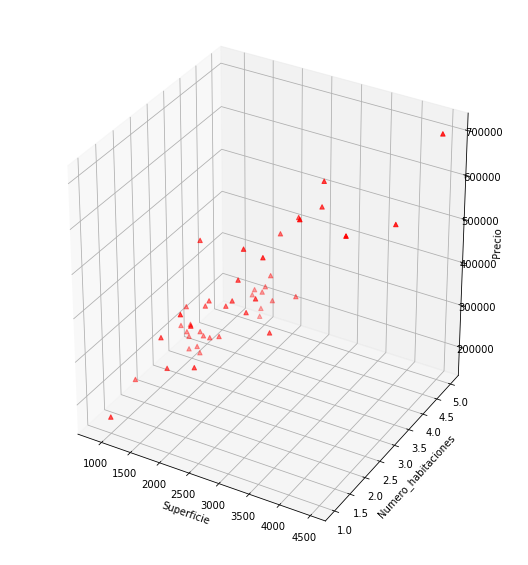

In [21]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2["Superficie"], df2["Numero_habitaciones"], df2["Precio"], c='r', marker='^')
 
ax.set_xlabel('Superficie')
ax.set_ylabel('Numero_habitaciones')
ax.set_zlabel('Precio')
 
plt.show()

Para poder utilizar el algoritmo Multivariate Regresion, es necesario realizar una etapa de normalización de las variables, para darles un valor entre -1 y 1. La librería Python Scikit-learn permite realizar este proceso.

In [42]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['Superficie', 'Numero_habitaciones']].as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Entre los algoritmos de Regresión Múltiples, existe el método <i>Ordinary Least Squares</i> (OLS). OLS es un método de optimización que busca minimizar la suma de las diferencias observadas entre las predicciones del modelo y los datos de entrenamiento. Con el paquete 'statsmodels', se puede entrenar un modelo OLS y obtener un resumen del modelo:

In [23]:
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     631.4
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           1.19e-33
Time:                        12:16:04   Log-Likelihood:                -589.11
No. Observations:                  47   AIC:                             1182.
Df Residuals:                      45   BIC:                             1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Superficie            140.8611    

La variable 'coef' nos indica cuál es el factor de ponderación de cada variable predictiva. Podemos entonces construir nuestra funcion de predicción:

In [24]:
def predict_price_of_house(Superficie, Numero_habitaciones):
    return 140.8611 * Superficie + 1.698e+04 * Numero_habitaciones

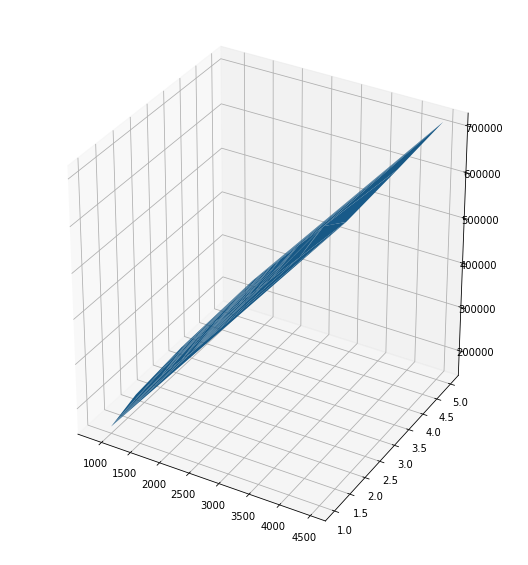

In [25]:
#Visualización del modelo obtenido

import matplotlib.pyplot as plt

def predict_all(lst_sizes, lst_nb_rooms):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_rooms[n]))
    return predicted_prices

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
 
ax.plot_trisurf(df2["Superficie"], df2["Numero_habitaciones"], predict_all(df2["Superficie"], df2["Numero_habitaciones"]))
                   
plt.show()


In [55]:
print(predict_price_of_house(4500,5))

718774.95


<b>Preguntas:</b>
- ¿Cuál es el principal limite de los modelos predictivos lineales?
    - Las ecuaciones son de primer orden por lo que las aproximaciones son lineales.
- ¿Qué es la Regresión Polinomial? ¿La Regresión Lineal es una Regresión Polinomial?
    - Se aproximan los coeficientes de un polinomio que servira para la aproximacion de las variables.
    - Si, es una regresión polinomial de primer orden.

<h2> 3. Trabajo práctico </h2>

<b>Problema</b>: 
    
<p>Tenemos a disposición un dataset con 1338 observaciones (filas) y 7 características (columnas): edad, genero, bmi (body mass index), número de niños, si es fumadora o no, su región y sus gastos en salud.</p>

<b>Pregunta</b>:
- Entrenar un modelo predictivo que estima los gastos de salud de un hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.<br>
R: 39549.467165567614
- Desde un punto de vista del emprendimiento, ¿qué podría ser el valor añadido de este tipo de modelo predictivo? a quién podría servir?<br>
R: Podria ser super util en campañas para mejorar la salud de las personas, insentivando el no al cigarrillo.
- Desde un punto de vista científico y ético, ¿qué críticas podría emitir?<br>
R: Me que la variable dependiende sea el gasto en salud porque en algunos casos el gasto genera un mayor impacto en las personas, pero creo que tambien seria util tomar algun tipo de indice enfermedades, ya que de esta forma el gasto estaría más justificado.


In [10]:
import pandas as pd
import statsmodels.api as sm
df3 = pd.read_csv("nb1-insurance.csv")
m = {'male' : 1, 'female' : 0}
n = {'yes' : 1, 'no' : 0}
df3['sex'] = df3['sex'].map(m)
df3['smoker'] = df3['smoker'].map(n)
print(df3.head())
# Variable objetivo
Y = df3["expenses"]
# Variables predictivas (o explicativas)
X = df3[['age','sex','children','smoker','bmi']]

exog = sm.add_constant(X)
# Fit and summarize OLS model
mod = sm.OLS(Y, exog).fit()
print (mod.summary())

   age  sex   bmi  children  smoker     region  expenses
0   19    0  27.9         0       1  southwest  16884.92
1   18    1  33.8         1       0  southeast   1725.55
2   28    1  33.0         3       0  southeast   4449.46
3   33    1  22.7         0       0  northwest  21984.47
4   32    1  28.9         0       0  northwest   3866.86
                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.1
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:29:47   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                 

In [9]:
from pprint import pprint as pp
a=mod.params
def predict(age,sex,children,smoker,bmi):
    return a['const'] + a['age']*age + a['sex']*sex + a['children']*children + a['smoker']*smoker + a['bmi']*bmi


print(predict(55, 1, 0, 1, 42.6))

39549.467165567614
